In [370]:
import datetime
import importlib
import matplotlib.pyplot as plt
import numpy
from pathlib import Path
import rasterio
from rasterio.plot import show as rio_show
import xarray as xr

import moad_tools.midoss.random_oil_spills as ros

%matplotlib inline

In [389]:
importlib.reload(ros)

<module 'moad_tools.midoss.random_oil_spills' from '/Users/sallen/Documents/MIDOSS/moad_tools/moad_tools/midoss/random_oil_spills.py'>

In [6]:
random_seed = 101
random_generator = numpy.random.default_rng(random_seed)

In [11]:
geotiffs_dir = Path('/Users/sallen/Documents/MIDOSS/ShipTrackDensityGeoTIFFs/')

In [10]:
spill_date_hour = datetime.datetime(2015, 9, 11, 13)

In [14]:
lats, lons, x_index, y_index, data_out = ros.get_lat_lon_indices(
            geotiffs_dir,
            spill_date_hour.month,
            n_locations=1,
            upsample_factor=1,
            random_generator=random_generator,
        )
print (lats, lons)

Randomly selecting spill location from all-traffic GeoTIFF:
...Creating 2D array of lat/lon strings (this may take a moment)
...Selecting 1 location(s)
...Creating vectors of lat/lon pairs and x-index/y-index pairs
That's a wrap, folks!
[-122.5946] [48.51603]


In [208]:
dataset = rasterio.open(geotiffs_dir/'all_2018_09.tif')

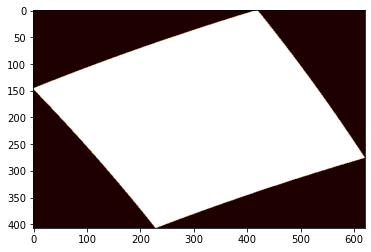

In [211]:
plt.imshow(dataset.read(1), cmap='pink', vmax=5);

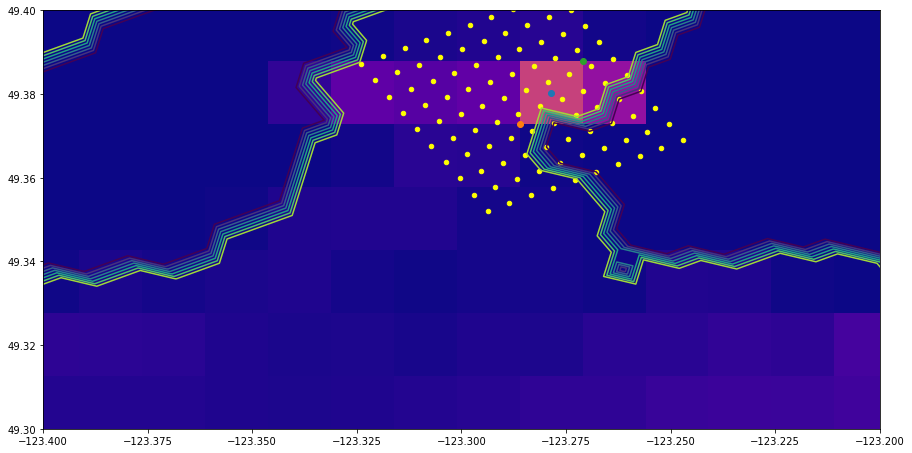

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rio_show(dataset, ax=ax, cmap='plasma')
plt.contour(mesh.glamt[0], mesh.gphit[0], mesh.tmask[0, 0])
for ii in range(475, 485):
    for jj in range(325, 335):
        plt.scatter(mesh.glamt[0, ii, jj], mesh.gphit[0, ii, jj], 20, color='yellow', marker='o')
plt.scatter(-123.27855104169004, 49.380291063794004)
plt.scatter(-123.2860663211802, 49.372775784303826)
plt.scatter(-123.27103576219986, 49.387806343284176)
#mylons = [for lam in mesh.glamt[0] if mesh.tmask[0, 0] > 0]
ax.set_xlim(-123.4, -123.2)
ax.set_ylim(49.3, 49.4);

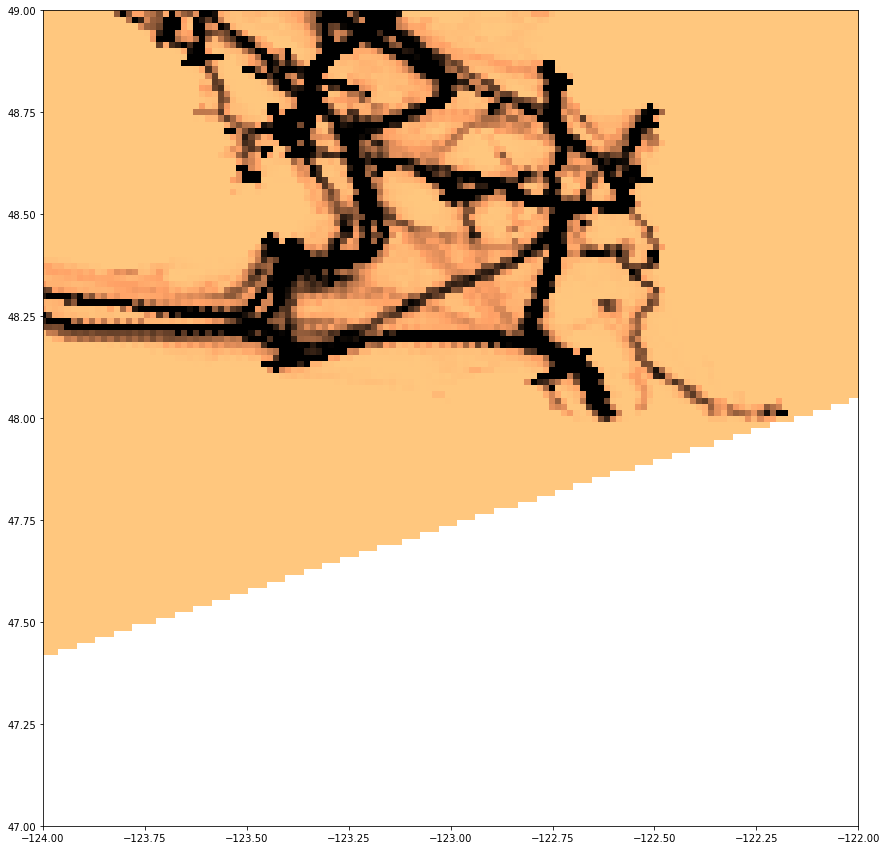

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
rio_show(dataset, ax=ax, cmap='copper_r', vmax=5);
ax.set_xlim(-124, -122)
ax.set_ylim(47, 49);

8


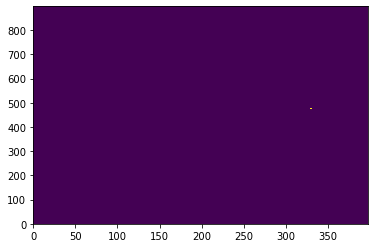

In [162]:
ll = [-123.2860663211802, 49.372775784303826]
ur = [-123.27103576219986, 49.387806343284176]
inner_points = (numpy.where(mesh.glamt[0] > ll[0], 1, 0) * 
                numpy.where(mesh.glamt[0] < ur[0], 1, 0) *
               numpy.where(mesh.gphit[0] > ll[1], 1, 0) * 
                numpy.where(mesh.gphit[0] < ur[1], 1, 0)) 

plt.pcolormesh(inner_points)
print (inner_points.sum())

In [140]:
density = dataset.read()
density.shape
xx = 202; yy = 482
density[0, xx, yy]
(llx, lly) = rasterio.transform.xy(dataset.transform, 
                                       xx+0.5, yy-0.5)
(urx, ury) = rasterio.transform.xy(dataset.transform, 
                                       xx-0.5, yy+0.5)
print (llx, lly, urx, ury)

-123.2860663211802 49.372775784303826 -123.27103576219986 49.387806343284176


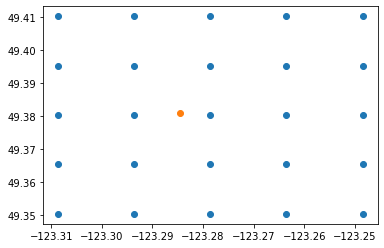

In [127]:

xx = range(200, 205)
yy = range(480, 485)
mxx, myy = numpy.meshgrid(xx, yy)
(x, y) = rasterio.transform.xy(dataset.transform, 
                                       mxx, myy)
plt.scatter(x, y)
plt.scatter(mesh.glamt[0, 480, 330], mesh.gphit[0, 480, 330])

In [39]:
lats = numpy.empty(100)
lons = numpy.empty_like(lats)
for count in range(100):
    if int(count/10)*10 == count:
        print (count)
    lats[count], lons[count], x_index, y_index, data_out = ros.get_lat_lon_indices(
            geotiffs_dir,
            spill_date_hour.month,
            n_locations=1,
            upsample_factor=1,
            random_generator=random_generator,
        )

0
10
20
30
40
50
60
70
80
90


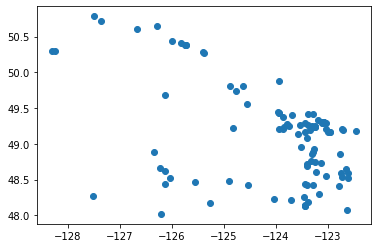

In [41]:
fig, ax = plt.subplots(1, 1)
ax.scatter(lats, lons)
#ax.set_xlim(-124, -122)
#ax.set_ylim(48, 50);

In [43]:
mesh = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')

In [48]:
 mesh.gphit[0, 897, 0]

<xarray.DataArray 'gphit' ()>
array(50.389927, dtype=float32)
Attributes:
    standard_name:  gphit
    long_name:      latitude of T-grid points
    units:          degrees_north

(1, 407, 620)


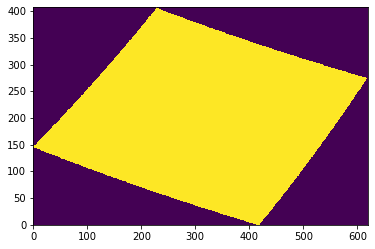

In [166]:
print (density.shape)
plt.pcolormesh(density[0])

In [201]:
countpts = numpy.empty_like(density[0])
for xx in range(0, density.shape[1], 1):
    if int(xx/10)*10 == xx:
        print(xx)
    for yy in range(0, density.shape[2], 1):
        (llx, lly) = rasterio.transform.xy(dataset.transform, 
                                       xx+0.5, yy-0.5)
        (urx, ury) = rasterio.transform.xy(dataset.transform, 
                                       xx-0.5, yy+0.5)
        inner_points = (numpy.where(mesh.glamt[0] > llx, 1, 0) * 
                numpy.where(mesh.glamt[0] < urx, 1, 0) *
               numpy.where(mesh.gphit[0] > lly, 1, 0) * 
                numpy.where(mesh.gphit[0] < ury, 1, 0) *
                numpy.where(mesh.tmask[0, 0] == 1, 1, 0))
        countpts[xx, yy] = inner_points.sum()
watermask = numpy.where(countpts > 0, True, False)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


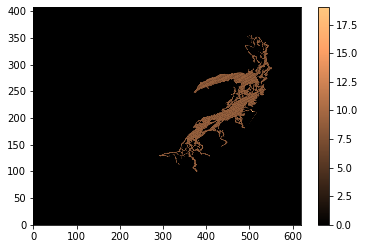

In [203]:
plt.pcolormesh(countpts, cmap='copper');
plt.colorbar()

In [205]:
with open('countpts.npy', 'wb') as f:
    numpy.save(f, countpts)

In [206]:
with open('gifmesh.npy', 'wb') as f:
    numpy.save(f, watermask)

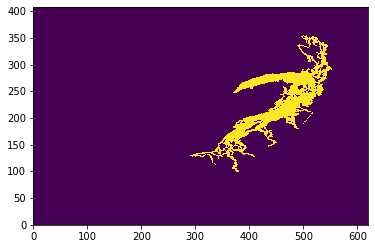

In [207]:
plt.pcolormesh(watermask);

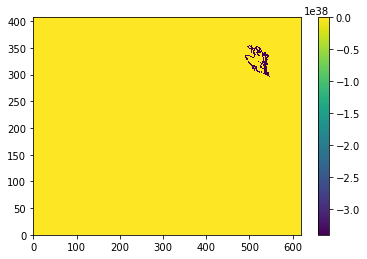

In [217]:
plt.pcolormesh(dataset.read(1) * watermask)
plt.colorbar()

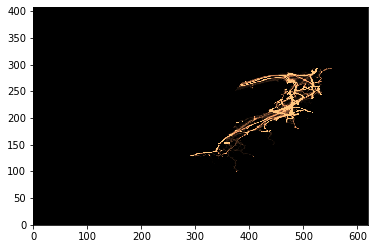

In [225]:
data = dataset.read(1)
data[data < 0] = 0
data = data * watermask
plt.pcolormesh(data, cmap='copper', vmax=5)

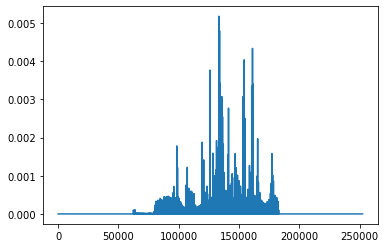

In [231]:
plt.plot(probability.flatten())

In [234]:
probability = data/data.sum()
mp = random_generator.choice(data.shape[0]*data.shape[1], 1, p=probability_distribution.flatten())[0]
print (mp, data.shape[0])

128821 407


In [239]:
py = int(numpy.floor(mp/data.shape[1]))
px = mp - py * data.shape[1]
print (px, py, data[py, px])

481 207 13.47202


In [259]:
nx = 10000
px = numpy.zeros(nx)
py = numpy.zeros_like(px)
for ii in range(nx):
    mp = random_generator.choice(data.shape[0]*data.shape[1], 1, p=probability.flatten())[0]
    py[ii] = int(numpy.floor(mp/data.shape[1]))
    px[ii] = mp - py[ii] * data.shape[1]

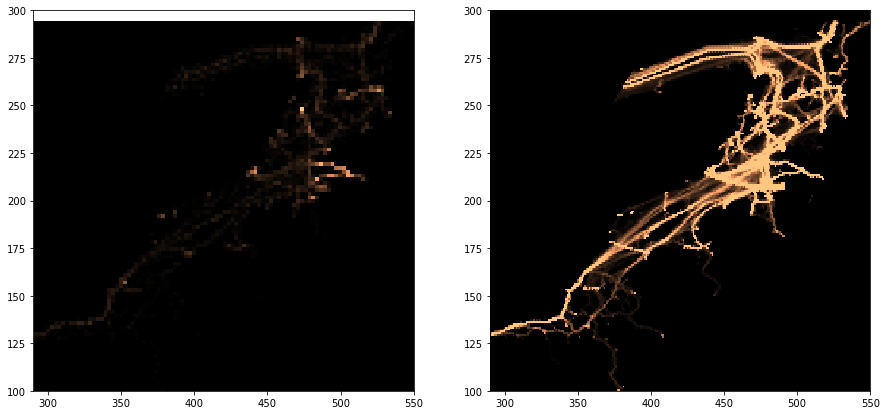

In [260]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist2d(px, py, bins=100, cmap='copper');
axs[1].pcolormesh(data, cmap='copper', vmax=5);
for ax in axs:
    ax.set_ylim(100, 300)
    ax.set_xlim(290, 550)

In [276]:
500/3.

166.66666666666666

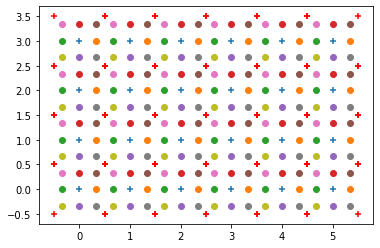

In [275]:
xs = range(6)
ys = range(4)
xxs, yys = numpy.meshgrid(xs, ys)
plt.scatter(xxs, yys, marker='+')
plt.scatter(xxs-0.5, yys-0.5, marker='+', color='r')
plt.scatter(xxs-0.5, yys+0.5, marker='+', color='r')
plt.scatter(xxs+0.5, yys-0.5, marker='+', color='r')
plt.scatter(xxs+0.5, yys+0.5, marker='+', color='r')
plt.scatter(xxs+0.3333, yys)
plt.scatter(xxs-0.3333, yys)
plt.scatter(xxs, yys+0.3333)
plt.scatter(xxs, yys-0.3333)
plt.scatter(xxs+0.3333, yys+0.3333)
plt.scatter(xxs-0.3333, yys+0.3333)
plt.scatter(xxs+0.3333, yys-0.3333)
plt.scatter(xxs-0.3333, yys-0.3333)

In [282]:
mp = random_generator.choice(data.shape[0]*data.shape[1], 1, p=probability.flatten())[0]
px = int(numpy.floor(mp/data.shape[1]))
py = mp - px * data.shape[1]
print (px, py)

277 508


In [281]:
density.shape

(1, 407, 620)

In [283]:
llx, lly = rasterio.transform.xy(dataset.transform, 
                                       px+0.5, py-0.5)
urx, ury = rasterio.transform.xy(dataset.transform, 
                                       px-0.5, py+0.5)
print (llx, lly, urx, ury)

-122.89527178769117 48.245483860777796 -122.88024122871083 48.26051441975814


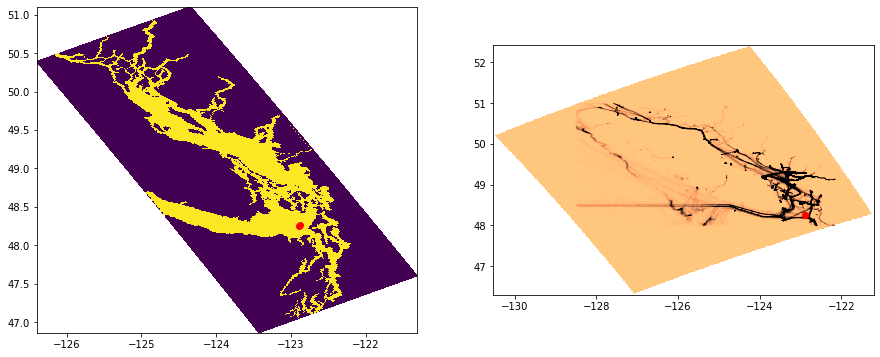

In [292]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].pcolormesh(mesh.glamt[0], mesh.gphit[0], mesh.tmask[0, 0])
rio_show(dataset, ax=axs[1], cmap='copper_r', vmax=5);
axs[0].scatter([llx, urx], [lly, ury], color='r')
axs[1].scatter([llx, urx], [lly, ury], color='r')

In [294]:
inner_points = (numpy.where(mesh.glamt[0] > llx, 1, 0) * 
                numpy.where(mesh.glamt[0] < urx, 1, 0) *
               numpy.where(mesh.gphit[0] > lly, 1, 0) * 
                numpy.where(mesh.gphit[0] < ury, 1, 0) *
                numpy.where(mesh.tmask[0, 0] == 1, 1, 0))
print(inner_points.sum())

9


In [303]:
ssp = random_generator.choice(mesh.tmask.shape[2]*mesh.tmask.shape[3], 1, 
                              p=inner_points.flatten()/inner_points.sum())
sslon = numpy.array(mesh.glamt[0]).flatten()[ssp]
sslat = numpy.array(mesh.gphit[0]).flatten()[ssp]
print (ssp, sslon, sslat)


[92982] [-122.883896] [48.251995]


In [304]:
one_third = 0.333
within_box = {'center': [0, 0],
             'left': [one_third, 0],
             'uleft': [one_third, one_third],
             'upper' : [0, one_third],
             'uright' : [-one_third, one_third],
             'right' : [-one_third, 0],
             'lright' : [-one_third, -one_third],
             'lower' : [0, -one_third],
             'lleft' : [one_third, -one_third]}

In [361]:
shift = (random_generator.choice(list(within_box.keys()), 1))[0]
print (shift, within_box[shift])

upper [0, 0.333]


In [312]:
print (ssp)

[92982]


In [334]:
width = mesh.tmask.shape[3]
aa, bb = numpy.array(mesh.glamt[0]).flatten()[ssp], numpy.array(mesh.glamt[0]).flatten()[ssp+1]
cc, dd = numpy.array(mesh.gphit[0]).flatten()[ssp], numpy.array(mesh.gphit[0]).flatten()[ssp+1]
ee, ff = numpy.array(mesh.glamt[0]).flatten()[ssp], numpy.array(mesh.glamt[0]).flatten()[ssp+width]
gg, hh = numpy.array(mesh.gphit[0]).flatten()[ssp], numpy.array(mesh.gphit[0]).flatten()[ssp+width]

(48.2, 48.325)

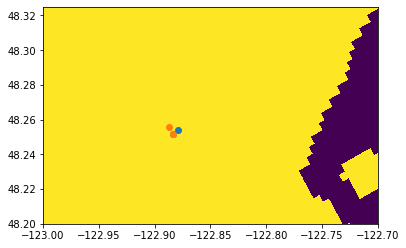

In [335]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.glamt[0], mesh.gphit[0], mesh.tmask[0, 0])
ax.scatter([aa, bb], [cc, dd])
ax.scatter([ee, ff], [gg, hh])
ax.set_aspect(1/ numpy.cos(50 * numpy.pi / 180))
ax.set_xlim(-123., -122.7)
ax.set_ylim(48.2, 48.325)

In [359]:
width = mesh.tmask.shape[3]
londx, latdx = ((numpy.array(mesh.glamt[0]).flatten()[ssp+1] - numpy.array(mesh.glamt[0]).flatten()[ssp])[0],
     (numpy.array(mesh.gphit[0]).flatten()[ssp+1] - numpy.array(mesh.gphit[0]).flatten()[ssp])[0])
londy, latdy = ((numpy.array(mesh.glamt[0]).flatten()[ssp+width] - numpy.array(mesh.glamt[0]).flatten()[ssp])[0],
     (numpy.array(mesh.gphit[0]).flatten()[ssp+width] - numpy.array(mesh.gphit[0]).flatten()[ssp])[0])

In [360]:
print (londx, latdx, londy, latdy)

0.0052337646 0.0019111633 -0.0033340454 0.003967285


In [363]:
lat = sslat + latdx * within_box[shift][0] + latdy * within_box[shift][1]
lon = sslon + londx * within_box[shift][0] + londy * within_box[shift][1]

(48.2, 48.325)

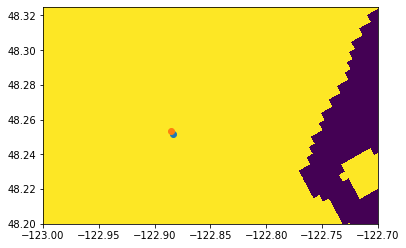

In [364]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(mesh.glamt[0], mesh.gphit[0], mesh.tmask[0, 0])
ax.scatter(sslon, sslat)
ax.scatter(lon, lat)
ax.set_aspect(1/ numpy.cos(50 * numpy.pi / 180))
ax.set_xlim(-123., -122.7)
ax.set_ylim(48.2, 48.325)

In [371]:
print (data.shape)

(407, 620)


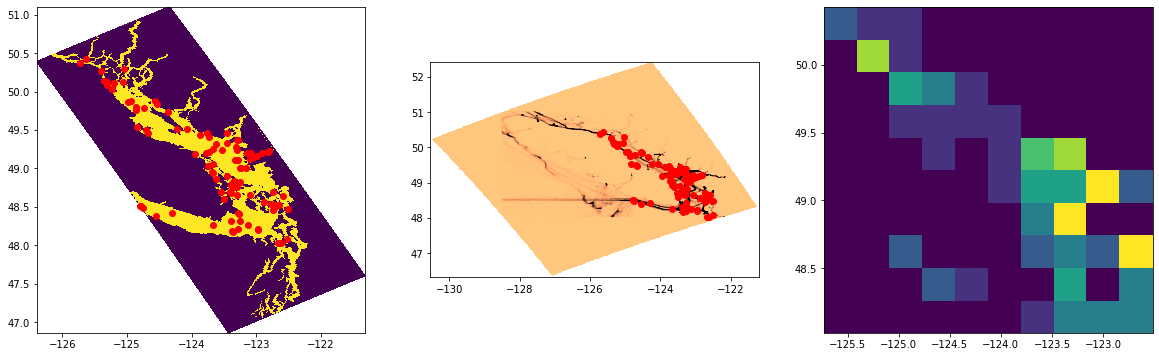

In [392]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].pcolormesh(mesh.glamt[0], mesh.gphit[0], mesh.tmask[0, 0])
rio_show(dataset, ax=axs[1], cmap='copper_r', vmax=5);
npoints = 100
lat = numpy.zeros(npoints)
lon = numpy.zeros_like(lat)
for ii in range(npoints):
    lat[ii], lon[ii], x_index, y_index, data_out = ros.get_lat_lon_indices(
            geotiffs_dir,
            spill_date_hour.month,
            watermask,
            mesh,
            random_generator=random_generator,
        )
    for ax in axs[:-1]:
        ax.scatter(lon[ii], lat[ii], color='r')
    axs[2].hist2d(lon, lat)